# Лабораторная работа №1
### Дьячков Вадим, 33501/4

## №1. Крестики-нолики

### Задание 1

$y = f1(x)$

$x = [x_1, x_2]$, $x_i \in \{1, 2, 3, 4\}$

$y_i \in \{0, 1\}$

In [1]:
import random as rnd
import numpy as np
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

rnd.seed(42)
sns.set(font_scale=1.5)

map1 = np.array([['O' if rnd.random() > 0.5 else 'X' for i in range(4)] for j in range(4)])

In [2]:
def f1(x):
    x = np.array(x)
    if len(x.shape) == 1:
        return map1[x[0] - 1, x[1] - 1]
    else:
        return np.array([f1(xi) for xi in x])[np.newaxis].T

In [3]:
def print_map1():
    print('x1\\x2', end='  ')
    for i in range(1, 5):
        print(i, end = ' ')
    print()
    for i in range(1, 5):
        print(i, end=''.ljust(6))
        for j in range(1, 5):
            print(f1([i, j]), end=' ')
        print()

In [4]:
print_map1()

x1\x2  1 2 3 4 
1      O X X X 
2      O O O X 
3      X X X O 
4      X X O O 


In [5]:
f1(np.array([1, 2])) # x1 = 1, x2 = 2

'X'

In [6]:
f1([4, 4]) # x1 = 4, x2 = 4

'O'

### Задание 2

In [7]:
p_1 = np.reshape(np.transpose(np.meshgrid([1, 2, 3, 4], [1, 2, 3, 4])), (16, 2))
t_1 = f1(p_1)

for i in range(len(p_1)):
    print(p_1[i], '->', t_1[i][0])

[1 1] -> O
[1 2] -> X
[1 3] -> X
[1 4] -> X
[2 1] -> O
[2 2] -> O
[2 3] -> O
[2 4] -> X
[3 1] -> X
[3 2] -> X
[3 3] -> X
[3 4] -> O
[4 1] -> X
[4 2] -> X
[4 3] -> O
[4 4] -> O


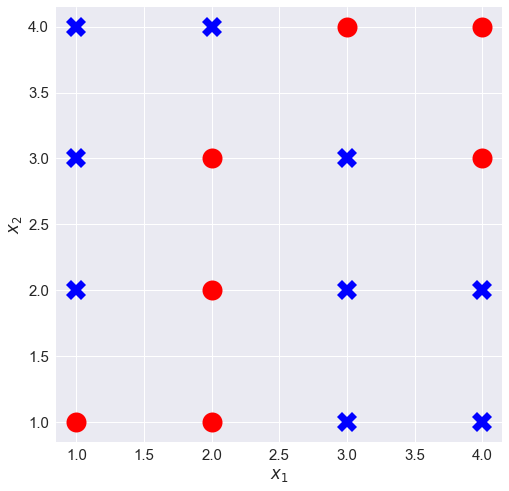

In [8]:
fig = plt.figure(figsize=(8, 8))
for i in range(len(p_1)):
    [x1, x2] = p_1[i]
    y = t_1[i][0]
    m = 'X' if y == 'X' else 'o'
    plt.plot(x1, x2, m, markersize=20, color=('r' if y == 'O' else 'b'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## №2. Логическая функция 5 переменных

### Задание 1

$y = f2(x)$

$x = [x_1, x_2, x_3, x_4, x_5]$, $x_i \in \{0, 1\}$

$y_i \in \{0, 1\}$

In [9]:
map2 = {'{0:b}'.format(i).zfill(5): 0 if rnd.random() > 0.25 else 1 
        for i in range(32)}

In [10]:
def f2(x):
    x = np.array(x)
    if len(x.shape) == 1:
        return map2[''.join([str(i) for i in x])]
    else:
        return np.array([f2(xi) for xi in x])[np.newaxis].T

In [11]:
map2

{'00000': 1,
 '00001': 0,
 '00010': 0,
 '00011': 1,
 '00100': 0,
 '00101': 0,
 '00110': 0,
 '00111': 1,
 '01000': 0,
 '01001': 0,
 '01010': 1,
 '01011': 1,
 '01100': 0,
 '01101': 0,
 '01110': 0,
 '01111': 0,
 '10000': 0,
 '10001': 0,
 '10010': 0,
 '10011': 0,
 '10100': 0,
 '10101': 0,
 '10110': 0,
 '10111': 0,
 '11000': 0,
 '11001': 1,
 '11010': 1,
 '11011': 0,
 '11100': 1,
 '11101': 1,
 '11110': 1,
 '11111': 0}

In [12]:
f2([1, 1, 1, 1, 0])  # 11110

1

In [13]:
f2([1, 1, 1, 1, 1])  # 11111

0

### Задание 2

In [14]:
p_2 = np.array(list(itertools.product([0, 1], repeat=5)))
t_2 = f2(p_2)

In [15]:
for i in range(len(p_2)):
    print(p_2[i], '->', t_2[i][0])

[0 0 0 0 0] -> 1
[0 0 0 0 1] -> 0
[0 0 0 1 0] -> 0
[0 0 0 1 1] -> 1
[0 0 1 0 0] -> 0
[0 0 1 0 1] -> 0
[0 0 1 1 0] -> 0
[0 0 1 1 1] -> 1
[0 1 0 0 0] -> 0
[0 1 0 0 1] -> 0
[0 1 0 1 0] -> 1
[0 1 0 1 1] -> 1
[0 1 1 0 0] -> 0
[0 1 1 0 1] -> 0
[0 1 1 1 0] -> 0
[0 1 1 1 1] -> 0
[1 0 0 0 0] -> 0
[1 0 0 0 1] -> 0
[1 0 0 1 0] -> 0
[1 0 0 1 1] -> 0
[1 0 1 0 0] -> 0
[1 0 1 0 1] -> 0
[1 0 1 1 0] -> 0
[1 0 1 1 1] -> 0
[1 1 0 0 0] -> 0
[1 1 0 0 1] -> 1
[1 1 0 1 0] -> 1
[1 1 0 1 1] -> 0
[1 1 1 0 0] -> 1
[1 1 1 0 1] -> 1
[1 1 1 1 0] -> 1
[1 1 1 1 1] -> 0


## №3. Разбиение плоскости на 2 класса

### Задание 1

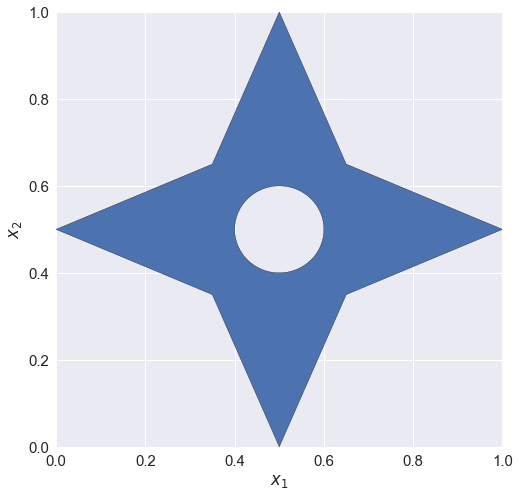

In [16]:
fig = plt.figure(1, figsize=(8, 8))
circle = Point(0.5, 0.5).buffer(0.1)
polygon = Polygon([(0, .5), (.35, .65), (.5, 1), (.65, .65), (1, .5), 
                   (.65, .35), (.5, 0), (.35, .35), (0, .5)])
polygon = polygon.difference(circle)

def f3(x):
    x = np.array(x)
    if len(x.shape) == 1:
        point = Point(x[0], x[1])
        return 1 if polygon.contains(point) else 0
    else:
        return np.array([f3(xi) for xi in x])[np.newaxis].T
    
ax = fig.add_subplot(111)
ax.add_patch(PolygonPatch(polygon))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [17]:
f3([0.5, 0.5])

0

In [18]:
f3([0.2, 0.2])

0

In [19]:
f3([0.5, 0.3])

1

### Задание 2

In [20]:
N = 41
x = np.linspace(0, 1, N)
p_3 = np.reshape(np.transpose(np.meshgrid(x, x)), (N * N, 2))
t_3 = f3(p_3)

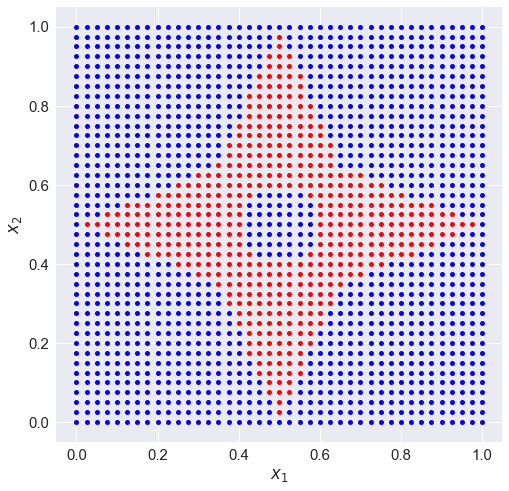

In [21]:
fig = plt.figure(figsize=(8, 8))
for i in range(len(p_3)):
    [x1, x2] = p_3[i]
    y = t_3[i][0]
    m = '.' if y == 1 else '.'
    c = 'r' if y == 1 else 'b'
    plt.plot(x1, x2, m, markersize=10, color=c)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## №4. Разбиение плоскости на $n$ классов

### Задание 1

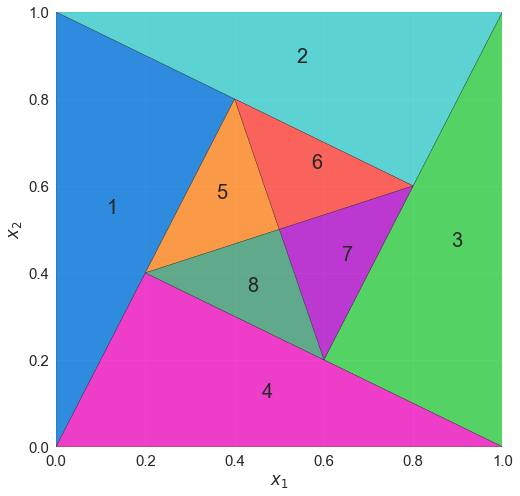

In [22]:
def get_position_for_text(polygon):
    coord = polygon.exterior.centroid.coords.xy
    return coord[0][0], coord[1][0]

polygons = {
    1: Polygon([(0, 0), (0, 1), (.4, .8)]),
    2: Polygon([(0, 1), (1, 1), (.8, .6)]),
    3: Polygon([(1, 1), (1, 0), (.6, .2)]),
    4: Polygon([(1, 0), (0, 0), (.2, .4)]),
    5: Polygon([(.2, .4), (.4, .8), (.5, .5)]),
    6: Polygon([(.4, .8), (.8, .6), (.5, .5)]),
    7: Polygon([(.6, .2), (.8, .6), (.5, .5)]),
    8: Polygon([(.2, .4), (.6, .2), (.5, .5)])
}

colors = {
    1: '#0074D9',
    2: '#39CCCC',
    3: '#2ECC40',
    4: '#F012BE',
    5: '#FF851B',
    6: '#FF4136',
    7: '#B10DC9',
    8: '#3D9970',
}

def f4(x):
    x = np.array(x)
    if len(x.shape) == 1:
        point = Point(x[0], x[1])
        for i, p in polygons.items():
            if point.distance(p) < 1e-8:
                return i
    else:
        return np.array([f4(xi) for xi in x])[np.newaxis].T

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)
for i, p in polygons.items():
    ax.add_patch(PolygonPatch(p, fc=colors[i], alpha=0.8))
    ax.annotate(i, xy=get_position_for_text(p), size=20)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [23]:
f4([0.9, 0.5])

3

In [24]:
f4([0.4, 0.6])

5

### Задание 2

In [25]:
N = 41
x = np.linspace(0, 1, N)
p_4 = np.reshape(np.transpose(np.meshgrid(x, x)), (N * N, 2))
t_4 = f4(p_4)

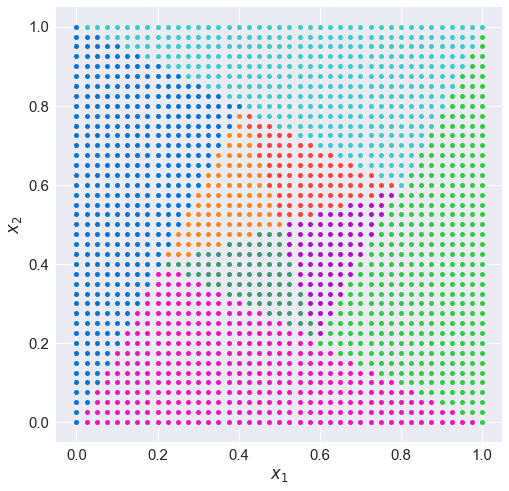

In [26]:
fig = plt.figure(figsize=(8, 8))
for i in range(len(p_4)):
    [x1, x2] = p_4[i]
    y = t_4[i][0]
    plt.plot(x1, x2, '.', markersize=10, color=colors[y])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## №5. Непрерывная функция одной переменной

### Задание 1

In [27]:
def f5(x):
    return (np.sin(50 * x) + np.sin(25 * x) + np.sin(10 * x) + np.cos(10 * x) + \
        np.exp(x - 1) + np.cosh(3 * (1-x)) + np.cosh(3 * x)) / 15

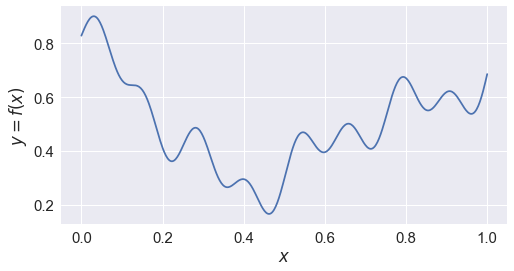

In [28]:
x_5 = np.linspace(0, 1, 500)
y_5 = f5(x_5)
fig = plt.figure(1, figsize=(8, 4))
plt.plot(x_5, y_5, '-', markersize=5)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.show()

### Задание 2

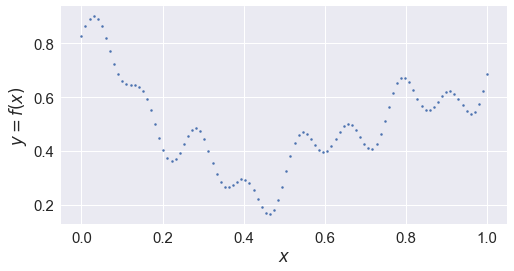

In [29]:
N = 100
p_5 = np.linspace(0, 1, N)
t_5 = f5(p_5)
fig = plt.figure(1, figsize=(8, 4))
plt.plot(p_5, t_5, '.', markersize=5)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.show()

## №6a. Линейная функция с памятью

### Задание 1

Линейная функция с памятью:
$$ y[n] = \sum_{i=0}^{h-1} x[n - i\cdot d]\cdot k_i $$
где $h$ – ширина окна, $d$ – глубина задержек, $k_i$ – коэффициенты.

Зададим коэффициенты: $h = 8, d = 4$.

$k_i = \left|\ \sin(i+1) \cdot 10\ \right|$

In [30]:
k = np.abs(np.sin(np.arange(8) + 1)) * 10
for i in range(len(k)):
    print('k{} = {}'.format(i, k[i]))

k0 = 8.414709848078965
k1 = 9.092974268256818
k2 = 1.4112000805986722
k3 = 7.5680249530792825
k4 = 9.589242746631385
k5 = 2.7941549819892586
k6 = 6.569865987187891
k7 = 9.893582466233818


### Задание 2

## №6b. Нелинейная функция с памятью

### Задание 1

Нелинейная функция с памятью:
$$ y[n] = f(x[n], x[n - d],..., x[n - (h - 1)\cdot d]) $$
где $h$ – ширина окна, $d$ – глубина задержек

Зададим коэффициенты: $h = 3, d = 2$.

### Задание 2

## №7. Линейное разностное уравнение

### Задание 1

### Задание 2

## №8. Многомерные образы

### Задание 1

### Задание 2